# Preâmbulo

Imports, funções, downloads e instalação do Pytorch.

In [ ]:
# # Reinstalling torch with the right CUDA bindings.
# !pip3 install -U https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl
# !pip3 install -U https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

In [ ]:
# Basic imports.
import os
import time
import numpy as np
import torch

from torch import nn
from torch import optim

from torch.utils.data import DataLoader
from torch.utils import data
from torch.backends import cudnn

from torchvision import models
from torchvision import datasets
from torchvision import transforms

from skimage import io

from sklearn import metrics

from matplotlib import pyplot as plt

%matplotlib inline

cudnn.benchmark = True

Para testar o resultado dos seus algoritmos vamos usar o módulo testing do numpy.

In [ ]:
from numpy.testing import assert_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

# Sintaxe básica do Pytorch

Assim como o NumPy, o Pytorch é uma biblioteca de processamento vetorial/matricial/tensorial. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy.

## Casting para o dispositivo correto

Como usaremos processamento vetorial principalmente em GPUs para aprendizado profundo, primeiramente é possível verificar se há uma GPU disponível com o trecho de código abaixo, armazenando os tensores nos dispositivos apropriados.

In [ ]:
# Checking if GPU/CUDA is available.
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


## Tensores no Pytorch

Criando tensores novos.

In [ ]:
tns = torch.tensor([1, 2, 3, 4, 5, 6])
print(tns)

tensor([1, 2, 3, 4, 5, 6])


Reorganizando tensores.

In [ ]:
print(tns.view(2, 3))

# Function view() with -1 infers the shape according to the remaining elements.
print(tns.view(3, -1))

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


Iniciando tensores vazios

In [ ]:
tns_0 = torch.zeros(2, 3)
tns_1 = torch.ones(2, 3)

print(tns_0)
print(tns_1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Iniciando tensores com valores aleatórios.

In [ ]:
tns_u = torch.rand(2, 3) # Flat distribution.
print(tns_u)

tns_n = torch.randn(2, 3) # Normal Distribution.
print(tns_n)

tns_perm = torch.randperm(6) # Random permutation of the interval [0, 5].
print(tns_perm)

tensor([[0.1397, 0.5822, 0.6251],
        [0.0727, 0.5437, 0.4736]])
tensor([[ 0.0156, -0.4262,  0.3110],
        [-1.4815, -0.3312,  1.7225]])
tensor([2, 1, 5, 0, 4, 3])


Operações com tensores.

In [ ]:
print(tns_u)
print(tns_n)

tns_sum = tns_u + tns_n
print(tns_sum)

tensor([[0.1397, 0.5822, 0.6251],
        [0.0727, 0.5437, 0.4736]])
tensor([[ 0.0156, -0.4262,  0.3110],
        [-1.4815, -0.3312,  1.7225]])
tensor([[ 0.1553,  0.1560,  0.9361],
        [-1.4088,  0.2125,  2.1961]])


Indexação.

In [ ]:
print(tns_sum[1, 1]) # Indexing element.
print(tns_sum[0, :]) # Indexing line.
print(tns_sum[:, 1]) # Indexing column.

tensor(0.2125)
tensor([0.1553, 0.1560, 0.9361])
tensor([0.1560, 0.2125])


Convertendo de tensores do numpy.

In [ ]:
np_arr = np.random.randn(2, 3)
print(np_arr, np_arr.dtype)

torch_tns = torch.from_numpy(np_arr)
print(torch_tns)

arr = torch_tns.numpy()
print(arr)

[[ 1.03965939  1.23946016  0.0149719 ]
 [-0.62285324  0.93375193  0.46781229]] float64
tensor([[ 1.0397,  1.2395,  0.0150],
        [-0.6229,  0.9338,  0.4678]], dtype=torch.float64)
[[ 1.03965939  1.23946016  0.0149719 ]
 [-0.62285324  0.93375193  0.46781229]]


Concatenando tensores.

In [ ]:
print(tns_u)
print(tns_n)

tns_cat = torch.cat((tns_u, tns_n), 0)
print(tns_cat)

tensor([[0.1397, 0.5822, 0.6251],
        [0.0727, 0.5437, 0.4736]])
tensor([[ 0.0156, -0.4262,  0.3110],
        [-1.4815, -0.3312,  1.7225]])
tensor([[ 0.1397,  0.5822,  0.6251],
        [ 0.0727,  0.5437,  0.4736],
        [ 0.0156, -0.4262,  0.3110],
        [-1.4815, -0.3312,  1.7225]])


Várias outras operações sobre tensores do Pytorch podem ser vistas nos seguintes tutoriais:
1.   https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/
2.   https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Conjunto de Problemas 1: Vetorização

Seu objetivo é medir a velocidade das operações de álgebra linear para diferentes níveis de vetorização. 

1. Construa duas matrizes $ A $ e $ B $ com entradas aleatórias Gaussianas de tamanho $ 128 \times 256 $. Use o módulo time para mensurar o tempo da operação.

In [ ]:
# Descomente e complete
# A =
# B =

In [ ]:
# testes, não apague as linhas!!
assert_equal((128, 256), A.shape)
assert_equal((128, 256), B.shape)

# A chamada asnumpy converte os vetores em vetores numpy. Útil para testes!
Anp = A.numpy()
Bnp = A.numpy()

# testando média e desvio padrão
assert_almost_equal(Anp.mean(), 0, decimal=2)
assert_almost_equal(Anp.std(ddof=1), 1, decimal=2)

assert_almost_equal(Bnp.mean(), 0, decimal=2)
assert_almost_equal(Bnp.std(ddof=1), 1, decimal=2)

2. Calcule $ C = AB^t $, tratando $ A $ como uma matriz, mas computando o resultado para cada coluna de $ B $. Isto é, use um laço `for`! Pare realizar este código, é importante entender o conceito de broadcasting. Para transpor uma matriz use `X.T`.

Em código numpy e torch, a operação de broadcasting replica linhas e colunas de tensores para realizar operações. Para entender melhor, leia o [documento](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). A figura abaixo exemplifica broadcasting. No geral, as dimensões de arrays casam, as operações são realizadas (primeira linha da figura). Mesmo quando as dimensões não casem, se a última dimensão for compatível é feito a replicação (broadcasting), ver a segunda linha da figura. Por fim, mesmo quando as dimensões não casam mas uma delas é 1 (4x1 + 1x3 na linha 3), é feito broadcasting.

Para fazer o código em uma linha apenas, você vai focar no caso da linha 2 da figura. Multiplique uma linha de A por B. Depois disso, use `.sum(axis=...)`.

#![](./figs/broadcasting.png)

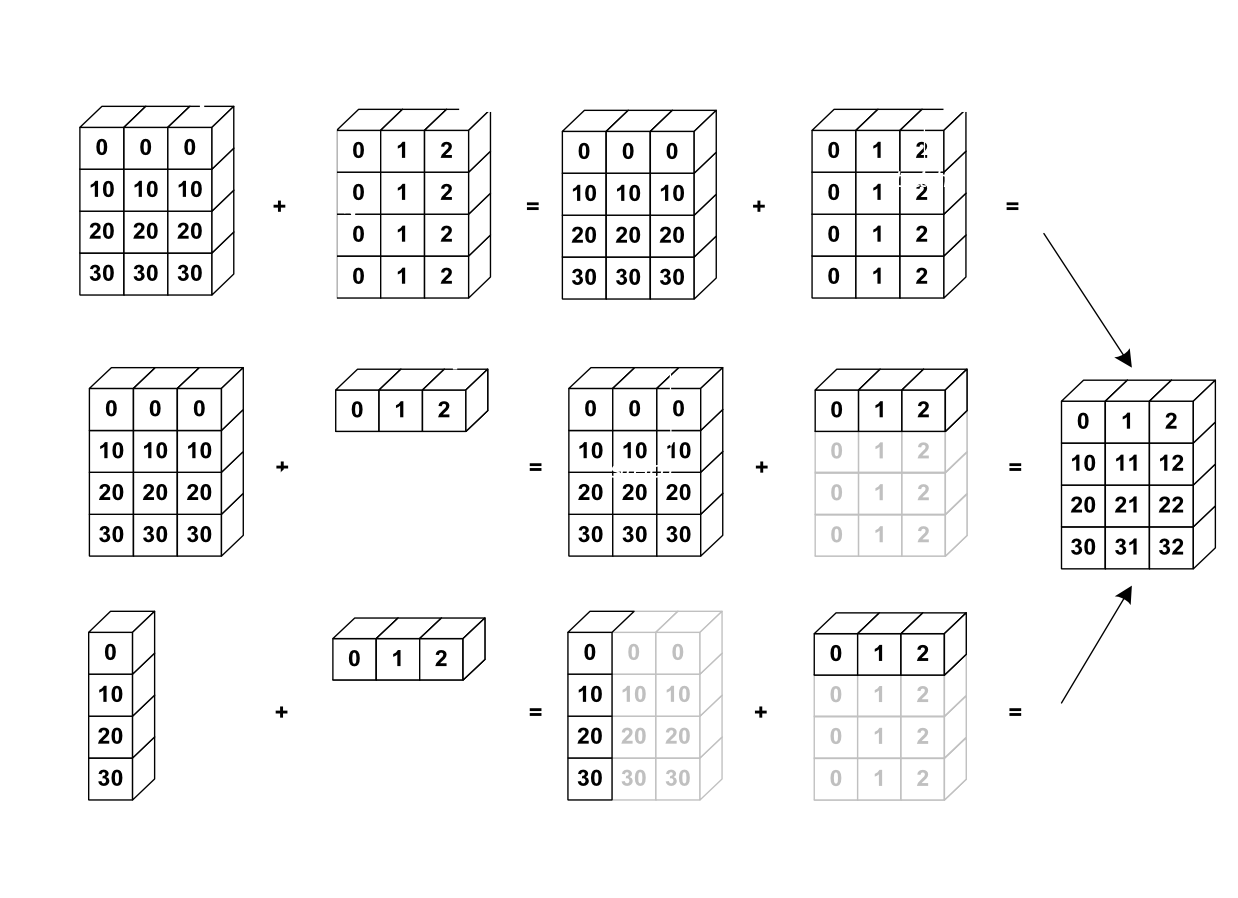



In [ ]:
C = np.zeros((128, 128))
for linha in range(B.shape[0]):
    # implemente

In [ ]:
# testes, não apague as linhas!!
Cteste = np.matmul(A, B.T)  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C, decimal=3)

3. Calcule $ C = AB^t $ usando operações matriciais. Ou seja, sem usar nenhum laço. Ao mensurar o tempo, ficou mais rápido?

In [ ]:
C = # ...

In [ ]:
# testes, não apague as linhas!!
Cteste = np.matmul(A, B.T)  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C, decimal=3)

## Conjunto de Problemas 2: Computação eficiente de memória

Crie duas matrizes aleatórias de tamanho $4096 \times 4096$. Chame as mesmas de A e B novamente.



In [ ]:
A = # ..
B = # ..

Queremos calcular $ C \leftarrow A \cdot B + C $, onde $ A, B $ e $ C $ são todas matrizes. Implemente isso da maneira mais eficiente em termos de memória!

4. Não aloque nova memória para o novo valor de $ C $. Não aloque nova memória para resultados intermediários, se possível.

In [ ]:
C = torch.zeros(A.shape)
C[:] = # ..

In [ ]:
# testes não apague!
Cteste = np.matmul(A, B.T)   # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

5. Crie uma função que recebe as matrizes A, B e C e um número de iterações para atualizar C. Essa função deve, primeiro, calcular a multiplicação de matrizes entre A e B e depois adicionar o valor à C de acordo como númeo de iterações. A mesma deve atualizar C sem alocar memória nova para essa variável.

In [ ]:
def update_c(C, A, B, niter=2):
    # implemente
    # pass

In [ ]:
# testes não apague!
Ct = torch.zeros(A.shape)
Cteste = (Ct + np.matmul(A, B))
Cteste = (Cteste + np.matmul(A, B))

C = torch.zeros(A.shape)
update_c(C, A, B, 2)
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

## Conjunto de Problemas 3: Programação Diferenciável

Agora vamos aprender um dos pontos chaves de fazer uso de bibliotecas como pytorch/tensorflow/etc, a programação diferenciável. Diferente do exercício que vocês fizeram na mão, usando a biblioteca conseguimos derivar de forma automágica. Portanto, observe como o código abaixo deriva a função seno.

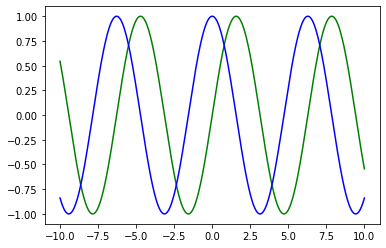

In [ ]:
x = np.linspace(-10, 10, 1000)
x_torch = torch.tensor(x, requires_grad=True)

y = torch.sin(x_torch)  # seno original

# Devido ao fato de que o y final não é um escalar precisamos passar o vetor v tal que v é a jacobiana 
# pela qual vamos multiplicar as jacobianas da variavel node (neste caso, x) conforme descrito em 
# https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
# veremos mais sobre o processo de backprogation, jacobiano, etc no futuro
v = torch.ones(x_torch.shape, dtype=torch.double)

# Como aqui x da origem a y diretamente, nosso v sera apenas um vetor de 1's com a mesma dimensao de x
y.backward(v)

plt.plot(x_torch.detach().numpy(), y.detach().numpy(), 'g', label='sin(x)')
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), 'b', label='sin\'(x)')

O resultado é a mesma curva da função cosseno! Para entender melhor o autograd, leia a seção respectiva do [pyTorch Blitz](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

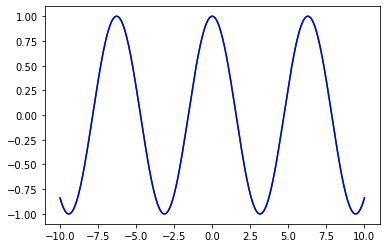

In [ ]:
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), 'g', label='sin\'(x)')
plt.plot(x_torch.detach().numpy(), torch.cos(x_torch).detach().numpy(), 'b', label='cos(x)')


6. Derive a função logística usando pytorch.

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [ ]:
x = np.linspace(-10, 10, 1000) # Não mude o valor de x!
# implemente

In [ ]:
# testes, não apagar
y_test = 1.0/(1 + np.exp(-x))
derivada_teste = y_test * (1 - y_test)
assert_array_almost_equal(derivada_teste, x_torch.grad.numpy(), decimal=3)

A operação *detach* permite quebrar a computação em várias partes. Em particular, isto é útil para aplicar a regra da cadeia. Suponha que $u = f(x)$ e $z = g(u)$, pela regra da cadeia, temos $\frac{dz}{dx}$ = $\frac{dz}{du}\frac{du}{dx}$. Para calcular $\frac{dz}{du}$, podemos primeiro separar $u$ da computação e, em seguida, chamar `z.backward()` para calcular o primeiro termo.

Observe no caso abaixo como derivamos $u = x^2$. A resposta deve ser $2x$ para cada termo `[0, 1, 2, 3]`.

In [ ]:
x = torch.arange(4, dtype =torch.float)
x.requires_grad_(True)

u = x * x
jacobX = torch.ones(x.shape) 
u.backward(jacobX)
x.grad

tensor([0., 2., 4., 6.])

Agora vamos fazer $z = u^3$ e computar as derivadas intermediarias.

In [ ]:
x = torch.arange(4, dtype = torch.float)
x.requires_grad_(True)

u = x * x
v = u.detach()  # u still keeps the computation graph
v.requires_grad_(True)
z = v * v * v

print(z)

jacobX = torch.ones(x.shape) 
u.backward(jacobX)
x.grad

tensor([  0.,   1.,  64., 729.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

Acima temos a derivada de x ao quadrado. Abaixo temos a derivada de g(x^2).

In [ ]:
jacobV = torch.ones(v.shape) 
z.backward(jacobV)
v.grad

tensor([  0.,   3.,  48., 243.])

7. Agora, sendo $f(x) = 1 + x^2$ e $g(x) = 1 + 7  f(x)^9$. Vamos aplicar a regra da cadeia em pytorch

In [ ]:
x = torch.arange(4, dtype = torch.float)

# implemente a derivada de x em funcao de f(x)

In [ ]:
# teste para x
assert_array_almost_equal([0, 2, 4, 6], x.grad.numpy())

In [ ]:
# implemente a derivada de g(x) em funcao de f(x)

In [ ]:
# teste para gx
expected = np.array([6.3000000e+01, 1.6128000e+04, 2.4609376e+07, 6.300000256000e+09])
assert_array_almost_equal(expected, v.grad.numpy(), 12)

## Conjunto de Problemas 4: Perceptron from Scratch

Por fim, vamos implementar uma primeira versão do Perceptron usando pytorch. Inicialmente, vamos gerar dois blobs linearmente separáveis. Com um seed bem setado, claramente teremos duas classes abaixo.

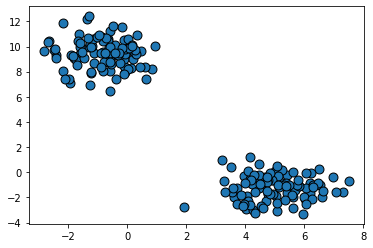

In [ ]:
from sklearn import datasets
state = np.random.seed(20190187)

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

8. Converta X e y para tensores torch

In [ ]:
X = # ..
y = # ..

Para realizar as nossas previsões, precisamos aplicar a seguinte função:

$$\hat{y}_i = \frac{1}{1 + e^{-(1 + \theta_1 x_{i1} + \theta_1 x_{i2}) + \cdots}}$$

Aqui $\hat{y}_i$ é a previsão de um único elemento. Podemos gerar uma matriz de previsões usando a forma matricial abaixo.

![](./figs/linear.png)

9. Sabendo que precisamos de uma coluna de valores 1 na nossa entrada $\mathbf{X}$, implemente uma função chamada `add_intercept` que adicionar uma nova coluna em X. A mesma deve retornar uma cópia! Não altere a matriz original.

In [ ]:
def add_intercept(X):
    # implemente
    pass

In [ ]:
# testes, não apague!
X_teste = torch.zeros(4, 4)
X_novo_teste = add_intercept(X_teste)
X_novo_teste = X_novo_teste.numpy()
assert_equal(X_teste.shape[0], X_novo_teste.shape[0])
assert_equal(X_teste.shape[1] + 1, X_novo_teste.shape[1])
assert_array_almost_equal(np.ones(X_novo_teste.shape[0]), X_novo_teste[:, 0])

10. Implemente uma função activation que faz uso da sigmoid. A mesma deve retornar um vetor de previsões para um X de entrada. Como regra, assuma que quando a ativação tem valor maior do que 0.5 vamos prever a classe 1. Então, sua resposta deve ser um vetor de 0s e 1s apenas. Não use nenhum laço!!

In [ ]:
def activation(X, theta, limiar=0.5):
    # implemente
    pass

In [ ]:
# testes, não apague!
X_teste = torch.randn(1000, 20000)
theta = torch.randn(20000,1)
y_hat_teste = activation(X_teste, theta)
assert_equal(True, (y_hat_teste >= 0).numpy().all())
assert_equal(True, (y_hat_teste <= 1).numpy().all())

11. Por fim, implemente agora o algoritmo do perceptron. O mesmo deve retornar um vetor de parâmetros theta. Execute o mesmo em X (com ou sem intercepto, no nosso exemplo simples não importa muito).

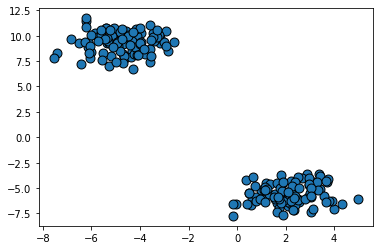

In [ ]:
state = np.random.seed(2017014421)
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
def perceptron(X, y, rate=0.005):
    Xn = add_intercept(X)
    # implemente
    pass
theta = perceptron(X, y)

Seu perceptron deve prever perfeitamente as classes!

In [ ]:
Xn = add_intercept(X)
y_p = (activation(Xn, theta) > 0.5).view(1,-1).int()
y = y.int()
(y_p == y).bool().reshape(1,-1)  # deve ser tudo True

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, T